# -INTRODUCTION-

In [122]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline 
#tells jupiter to display pictures within notebook

In [123]:
#define input and output layer size

In [124]:
N0=3
N1=2

In [125]:
#assign random weights to the paths with values between -1 and 1

In [126]:
w=random.uniform(low=-1, high=1, size=(N1, N0))
b=random.uniform(low=-1, high=1, size=(N1))

In [127]:
y_in=array ([0.2, 0.4, -0.1])  #def a matrix with input data

In [128]:
#now we calculate z and pass it into the nonlinear function

In [129]:
z=dot(w,y_in)+b
y_out=1/1+exp(-z)  #the function is sigmoid

In [130]:
print(f"y_in: {y_in}\n")
print(f"w: {w}\n")
print(f"b: {b}\n")
print(f"z: {z}\n")
print(f"y_out: {y_out}\n")

y_in: [ 0.2  0.4 -0.1]

w: [[-0.98866724  0.12249462 -0.73244388]
 [-0.33996324 -0.96048367 -0.83522891]]

b: [-0.40542418 -0.93096806]

z: [-0.48091539 -1.29963129]

y_out: [2.61755442 4.667944  ]



# VISULAIZATION

In [131]:
def apply(y_in):
    global w,b      
    
    z=dot(w,y_in)+b
    return (1/(1+exp(-z)))

In [132]:
N0=2
N1=1

w=random.uniform(low=-10, high=10, size=(N1, N0))
b=random.uniform(low=-1, high=1, size=N1)

In [133]:
apply([0.8,0.3])


array([0.9999179])

In [134]:
M=50   #pic of size 50x50 pixels
y_out=zeros([M,M]) #defining an array to hold the results
#numpy.zeros(shape, dtype=float, order='C', *, like=None)
#Return a new array of given shape and type, filled with zeros.

for j1 in range(M):
    for j2 in range(M):
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply([value0, value1])

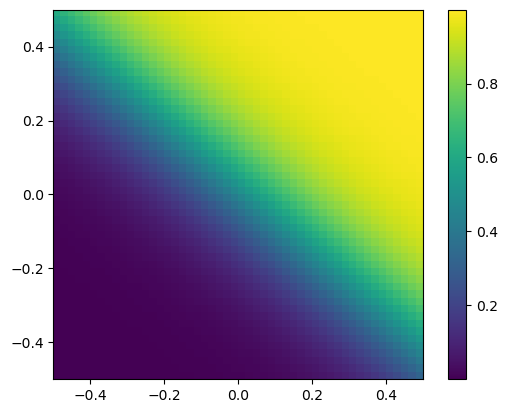

In [135]:
#display image
plt.imshow(y_out, origin='lower', extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

# -MULTI-LAYER NN-

In [136]:
#applying the layer a couple of times

In [137]:
#2 inputs, 5 hidden layers, 1 output

In [138]:
def apply_layer(y_in, w, b):
    z=dot(w, y_in)+b
    return (1/(1+exp(-z)))

In [139]:
N0=2
N1=30
N2=1

#from input to hidden layer
w1=random.uniform(low=-10, high=10, size=(N1, N0))
b1=random.uniform(low=-1, high=1, size=N1)

#from hidden to output layer
w2=random.uniform(low=-10, high=10, size=(N2, N1))
b2=random.uniform(low=-1, high=1, size=N2)


In [140]:
def apply_net(y_in):
    global w1, w2, b1, b2
    
    y1=apply_layer(y_in, w1, b1)
    y2=apply_layer(y1, w2, b2)

    return (y2)

In [141]:
M=50   
y_out=zeros([M,M]) 

for j1 in range(M):
    for j2 in range(M):
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0, value1])[0]

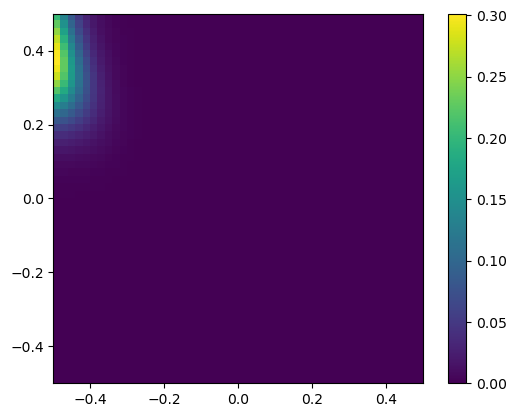

In [142]:
plt.imshow(y_out, origin='lower', extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

# IMPLEMENTATION WITHOUT LOOPS

In [143]:
#With the shape() method, comes the flexibility to obtain the 
#dimensions of any Python object. It returns a tuple value that indicates the dimensions
#of a Python object.Every value represented by the tuple corresponds to the actual dimension in terms of array or row/columns.

In [144]:
y=zeros([30,15])
W=zeros([15,5])
shape(dot(y,W))


(30, 5)

In [145]:
B=zeros(5)
result=dot(y,W)+B
shape(result)


(30, 5)

In [146]:
def apply_layer_new(y_in,w,b): 
    
    z=dot(y_in,w)+b 
    return(1/(1+exp(-z)))

In [147]:
def apply_net_new(y_in): 
    global w1,b1,w2,b2

    y1=apply_layer_new(y_in,w1,b1)
    y2=apply_layer_new(y1,w2,b2)
    return(y2)


In [148]:
N0=2 
N1=5 
N2=1 
w1=random.uniform(low=-10,high=+10,size=(N0,N1)) 
b1=random.uniform(low=-1,high=+1,size=N1) 

w2=random.uniform(low=-10,high=+10,size=(N1,N2)) 
b2=random.uniform(low=-1,high=+1,size=N2) 


In [149]:
batchsize=10000
y=random.uniform(low=-1,high=1,size=(batchsize,2))


In [150]:
y_out=apply_net_new(y)
shape(y_out)

(10000, 1)

In [151]:
M=50

v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))


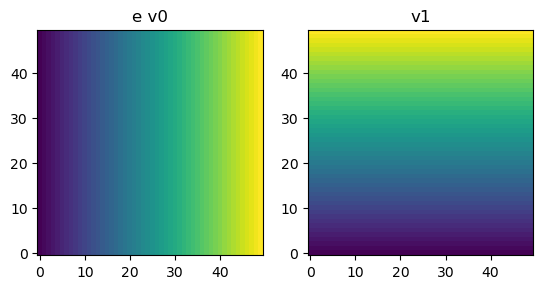

In [152]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(v0,origin='lower')
ax[0].set_title("e v0")
ax[1].imshow(v1,origin='lower')
ax[1].set_title("v1")
plt.show()


# Many Hidden Layers

In [153]:
Nlayers=20
layerSize=100

In [154]:
def apply_layer(y_in, w, b):
    z=dot(y_in, w)+b
    return (1/(1+exp(-z)))

In [155]:

#hidden layers
w0=random.uniform(low=-3, high=3, size=(Nlayers, layerSize, layerSize))
b0=random.uniform(low=-1, high=1, size=(Nlayers, layerSize))

#from input to hidden layer
w1=random.uniform(low=-1, high=1, size=(2, layerSize))
b1=random.uniform(low=-1, high=1, size=layerSize)

#from hidden to output layer
w2=random.uniform(low=-1, high=1, size=(layerSize, 1))
b2=random.uniform(low=-1, high=1, size=1)

In [156]:
def apply_net(y_in):
    global w1, w2, b1, b2
    
    y=apply_layer(y_in, w1, b1)
    for j in range(Nlayers):
        y=apply_layer(y, w0[j,:,:], b0[j,:])
    y_out=apply_layer(y, w2, b2)

    return (y_out)

In [157]:
M=400
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))
batchsize=M**2 
y_in=zeros([batchsize,2])
y_in[:,0]=v0.flatten() 
y_in[:,1]=v1.flatten() 

In [158]:
y_out=apply_net(y_in) 

In [159]:
y_2D=reshape(y_out[:,0],[M,M]) 

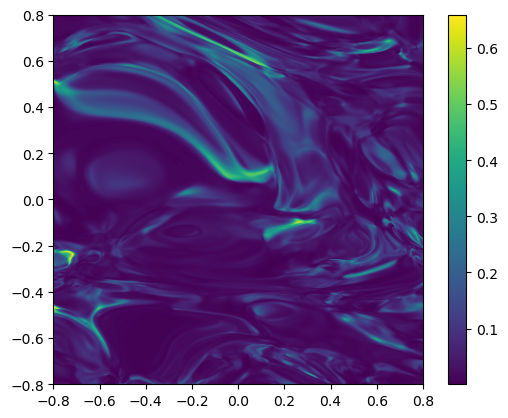

In [160]:
#display image
plt.imshow(y_2D, origin='lower', extent=(-0.8,0.8,-0.8,0.8))
plt.colorbar()
plt.show()